# Introduction to Word Embeddings

Based on https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db

In [1]:
# Download GloVe vectors from https://nlp.stanford.edu/projects/glove/
# Specifically the 6B one, which is the smallest: http://nlp.stanford.edu/data/glove.6B.zip

import os
import numpy as np
from scipy import spatial
from sklearn.manifold import TSNE

In [6]:
embeddings_dict = {}
glove_file = os.path.join("glove.6B", "glove.6B.50d.txt")
with open(glove_file, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

print("There are {} words in the dictionary".format(len(embeddings_dict)))

word = "king"
vec = embeddings_dict[word]
print("\nVector for \"{}\":".format(word))
print(vec)
print("Vector length: {}".format(len(vec)))

There are 400000 words in the dictionary

Vector for "king":
[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]
Vector length: 50


In [3]:
def find_closest_embeddings(vec, N):
    sorted_dict = sorted(embeddings_dict.keys(), 
        key=lambda word: spatial.distance.euclidean(embeddings_dict[word], vec))
    return sorted_dict[1:N+1]

vec = embeddings_dict["king"]
print(find_closest_embeddings(vec,3))

vec = embeddings_dict["king"] + embeddings_dict["woman"] - embeddings_dict["man"]
print(find_closest_embeddings(vec,3))

vec = embeddings_dict["south"] - embeddings_dict["down"] + embeddings_dict["up"]
print(find_closest_embeddings(vec,3))

['prince', 'queen', 'uncle']
['queen', 'prince', 'elizabeth']
['north', 'east', 'west']


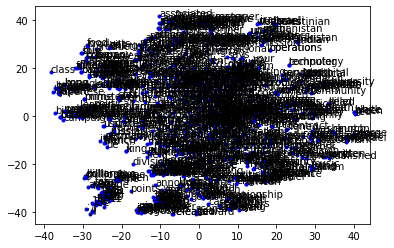

In [8]:
import matplotlib.pyplot as plt
import mpld3
%matplotlib inline
mpld3.enable_notebook()

tsne = TSNE(n_components=2, random_state=0)
words = list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
Y = tsne.fit_transform(vectors[:1000])

plt.plot(Y[:,0], Y[:,1] ,"b.")
for label, x, y in zip(words, Y[:, 0].tolist(), Y[:, 1].tolist()):
    plt.text(x, y, label)
plt.show()